In [1]:
## Binary Classification Using VGG16

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Loding Data

In [4]:
data_set_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification' # root folder 

In [5]:
# finding training data path and test data path 

In [6]:
train_data_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/training_set'
test_data_path = '/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set'

In [7]:
# Making Images into linear format using tensorflow ImageDataGenerator

In [8]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
preprocess_train = ImageDataGenerator(rescale = 1. / 255 , 
                                      shear_range = 0.2 , 
                                      zoom_range = 0.4,
                                      vertical_flip = True,
                                      horizontal_flip = True)


preprocess_test = ImageDataGenerator(rescale = 1./255)

In [10]:
# Collecting each image from train and test folder

In [11]:
labels = ['cats','dogs']

In [12]:
train_data = preprocess_train.flow_from_directory(train_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 8005 images belonging to 2 classes.


In [13]:
test_data = preprocess_test.flow_from_directory(test_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 2023 images belonging to 2 classes.


In [14]:
## Now I am not developing my own custom model so I am taking a copy of vgg16 Architecture

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
## Making Image Size

In [17]:
image_size = [256,256]

In [18]:
sol = VGG16(input_shape = image_size + [3] , weights='imagenet' , include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [19]:
# We Should not  update weights of vgg16:

In [20]:
for i in sol.layers:
  i.trainable = False

In [21]:
from tensorflow.keras.layers import Flatten

In [22]:
# Developing my own output layer:

In [23]:
y = Flatten()(sol.output)

In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [25]:
from keras.api._v2.keras import activations
final = Dense(1 ,activation = 'sigmoid')(y)

In [26]:
from tensorflow.keras.models import Model

In [27]:
vgg16_model = Model(sol.inputs , final)

In [28]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [29]:
vgg16_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])

In [31]:
vgg16_model.fit(train_data , epochs = 2)

Epoch 1/2
251/251 [==============================] - 2755s 11s/step - loss: 0.4591 - Accuracy: 0.7839
Epoch 2/2
251/251 [==============================] - 152s 607ms/step - loss: 0.3344 - Accuracy: 0.8488


In [32]:
# checking with test_data

In [33]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [34]:
y_test_pred = vgg16_model.predict(test_data)

64/64 [==============================] - 595s 9s/step


In [35]:
y_test_pred

array([[0.10218176],
       [0.96232235],
       [0.94279647],
       ...,
       [0.03233387],
       [0.9973713 ],
       [0.99887794]], dtype=float32)

In [36]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [37]:
c

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [38]:
### Checking Accuracy and Confusion Matrix Classifiaction Report

In [40]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [41]:
accuracy_score(test_data.classes , c)

0.5121107266435986

In [42]:
confusion_matrix(test_data.classes , c)

array([[431, 580],
       [407, 605]])

In [43]:

print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47      1011
           1       0.51      0.60      0.55      1012

    accuracy                           0.51      2023
   macro avg       0.51      0.51      0.51      2023
weighted avg       0.51      0.51      0.51      2023



In [44]:
## Checking With Own Data

In [45]:
import cv2

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg16_model.predict(image)
  print(result)
  if result > 0.5:
    print('dog')
  else:
    print('cat')
  img = plt.imread(path)
  plt.imshow(img)


In [48]:
## Checking with Cat Images

(1, 256, 256, 3)
1/1 [==============================] - 1s 660ms/step
[[0.29465213]]
cat


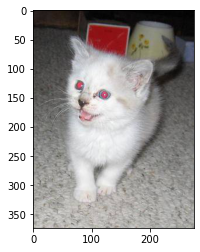

In [49]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4018.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
[[0.00196278]]
cat


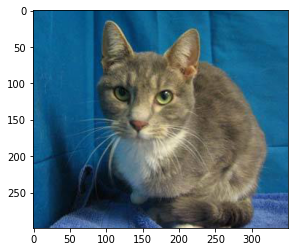

In [50]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4048.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
[[3.0760926e-05]]
cat


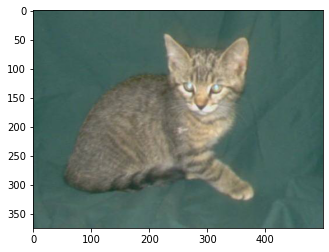

In [51]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/cats/cat.4078.jpg')

In [52]:
## Checking Dog Images

(1, 256, 256, 3)
1/1 [==============================] - 0s 21ms/step
[[0.9999995]]
dog


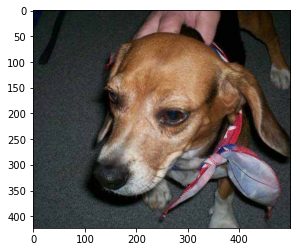

In [53]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4244.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step
[[0.99994373]]
dog


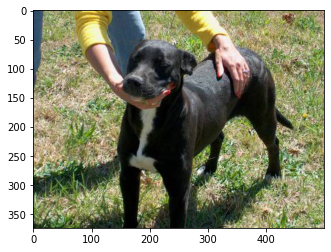

In [54]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4158.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 48ms/step
[[0.9999999]]
dog


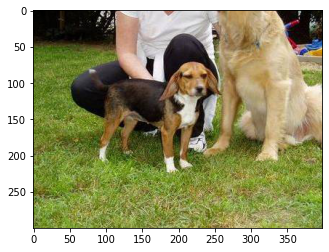

In [55]:
predictions('/content/drive/MyDrive/Data sets/Cat Dog Binary Classification/test_set/dogs/dog.4131.jpg')